# Assignment 05 - Descriptive stats and plotting

**load libaries and data**

[link to data](https://corgis-edu.github.io/corgis/csv/food/)

In [32]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('food.csv')

In [4]:
df.describe()

,Nutrient Data Bank Number,Data.Alpha Carotene,Data.Beta Carotene,Data.Beta Cryptoxanthin,Data.Carbohydrate,Data.Cholesterol,Data.Choline,Data.Fiber,Data.Lutein and Zeaxanthin,Data.Lycopene,...,Data.Major Minerals.Phosphorus,Data.Major Minerals.Potassium,Data.Major Minerals.Sodium,Data.Major Minerals.Zinc,Data.Vitamins.Vitamin A - RAE,Data.Vitamins.Vitamin B12,Data.Vitamins.Vitamin B6,Data.Vitamins.Vitamin C,Data.Vitamins.Vitamin E,Data.Vitamins.Vitamin K
count,7.083000e+03,7083.000000,7083.000000,7083.000000,7083.000000,7083.000000,7083.000000,7083.000000,7083.000000,7083.000000,...,7083.000000,7083.000000,7083.000000,7083.000000,7083.000000,7083.000000,7083.000000,7083.000000,7083.000000,7083.000000
mean,4.884965e+07,43.759283,255.363405,4.862346,20.828039,34.458845,34.440802,1.703840,213.351687,263.571933,...,133.088945,217.127488,340.503459,1.281451,73.139065,0.705177,0.197528,5.696216,1.086955,14.206607
std,2.425159e+07,259.520139,995.709951,38.047657,21.887363,77.479105,43.901497,2.558168,1015.888615,1161.245139,...,126.498700,204.812523,350.333632,2.917233,241.913126,2.502821,0.374608,15.548490,3.133890,54.944096
min,1.100000e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.715077e+07,0.000000,0.000000,0.000000,5.650000,0.000000,10.000000,0.100000,0.000000,0.000000,...,48.000000,111.000000,124.000000,0.360000,2.000000,0.000000,0.052000,0.000000,0.230000,0.800000
50%,5.326020e+07,0.000000,8.000000,0.000000,13.300000,8.000000,19.600000,1.000000,18.000000,0.000000,...,102.000000,183.000000,313.000000,0.680000,20.000000,0.180000,0.110000,0.700000,0.550000,3.800000
75%,6.720345e+07,1.000000,73.000000,1.000000,26.195000,46.000000,44.200000,2.100000,81.000000,0.000000,...,189.000000,270.500000,454.000000,1.360000,61.000000,0.550000,0.203000,5.300000,1.110000,9.300000
max,9.999821e+07,4655.000000,14134.000000,1922.000000,100.000000,3074.000000,820.200000,46.200000,15643.000000,45902.000000,...,1429.000000,6040.000000,7851.000000,98.860000,9363.000000,82.440000,12.000000,560.000000,149.400000,1640.000000


**calculate the mean, median, mode, and trimmed mean of carbohydrate column**

In [5]:
df['Data.Carbohydrate'].mean()

20.82803896653962

In [6]:
df['Data.Carbohydrate'].median()

13.3

In [7]:
df['Data.Carbohydrate'].mode()

0    0.0
dtype: float64

In [12]:
# copy dataset, sortign by column of interest
df2 = df.sort_values(by='Data.Carbohydrate',ignore_index=True).copy()
df2['Data.Carbohydrate']

0         0.00
1         0.00
2         0.00
3         0.00
4         0.00
         ...  
7078     99.60
7079     99.60
7080     99.77
7081    100.00
7082    100.00
Name: Data.Carbohydrate, Length: 7083, dtype: float64

In [13]:
# get the trimmed mean by ignoreing the first 10% and last 10% of data
df2.loc[int(0.1*7082):int(0.9*7082),'Data.Carbohydrate'].mean()

16.89091775503001

**Histogram of carbohydrate data (with comments on the relative locations of the mean, median, mode, and trimmed mean)**

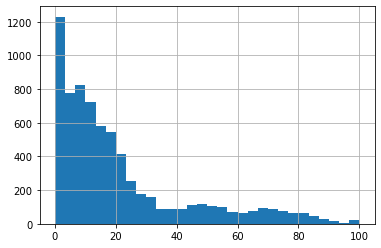

In [19]:
df['Data.Carbohydrate'].hist(bins=30);

NOTES: the mode of 0 is most obvious in the far left of the histogram. the other measures of central tendency are heavily skewed by the disproportionately high frequency of low values. The median (13), trimmed mean (16), and mean (20) are in that order from the left.

**calculations for mean absolute deviation, the standard deviation, and the interquartile range (the difference of the 75% and 25% quantile)
(with notes on how they compare to each other and to the histogram plot**

In [21]:
df['Data.Carbohydrate'].mad()

16.532441492575266

In [20]:
df['Data.Carbohydrate'].std()

21.88736257536951

In [23]:
df['Data.Carbohydrate'].quantile(0.75) - df['Data.Carbohydrate'].quantile(0.25)


20.545

In [27]:
df['Data.Carbohydrate'].quantile(0.25)

5.65

the mean absolute deviation is about 16, so on average each point deviates from the mean by 16, that seem pretty low considering the range of values, however again, the data is skewed such there is an excessively high frequency of low values (mostly 0). The standard deviation is a littl ebit higher (about 21), which is pretty close the intergartile range.

**Box plot of carbohydrate column (with notes on how the locations of the calculated median and the 25% and 75% quantiles match with features in the plot)**

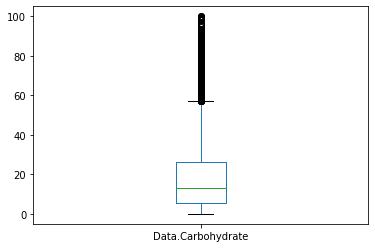

In [25]:
df['Data.Carbohydrate'].plot(kind='box');

the box plot shows that the median does look to be about 13, and the 25% and 75% quantiles to be about 5 and 25, respecitively (so ~25 - ~5 = ~20 for interquartile range; also when we actually calc these values they are 26.125 and 5.65). Maybe most importantly, this plot indicates that a large number of values over ~60 may be outliers.

**making a new column in the dataframe where values are equal to either 0, 1, or 2.**  

**For any given row:**

**If the COL1 value < 0.5 * (COL1 mean), set the COL1_mean_split value to 0**

**If the COL1 value >= 0.5 * (COL1 mean) and COL1 value < (COL1 mean), set the COL1_mean_split value to 1**

**If the COL1 value >= (COL1 mean), set the COL1_mean_split value to 2**

In [29]:
df['Data.Carbohydrate'].mean()

20.82803896653962

In [28]:
0.5 * df['Data.Carbohydrate'].mean()

10.41401948326981

In [46]:
conditions = [
    (df['Data.Carbohydrate'] < 10.41),
    (df['Data.Carbohydrate'] >= 10.41) & (df['Data.Carbohydrate'] < 20.821),
    (df['Data.Carbohydrate'] >= 20.82)
    ]

values = [0,1,2]

df['COL1_mean_split'] = np.select(conditions, values)

In [51]:
#just to make sure it worked..

df['COL1_mean_split'].describe()

count    7083.000000
mean        0.908937
std         0.850790
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         2.000000
Name: COL1_mean_split, dtype: float64

**bar plot showing the count of the values of 0, 1, and 2 in the COL1_mean_split column**

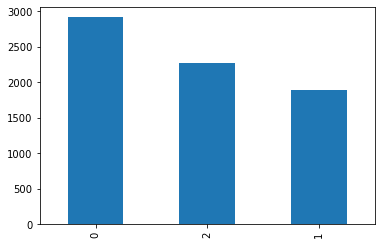

In [68]:
df['COL1_mean_split'].value_counts().plot(kind='bar');

**box plot of the carbohydrate values grouped by mean_split values**

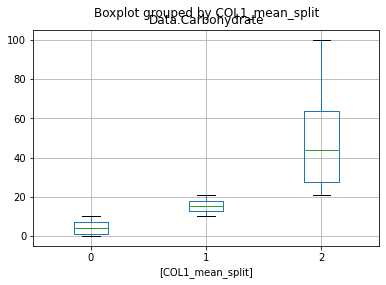

In [73]:
df.boxplot(column=['Data.Carbohydrate'], by=['COL1_mean_split']);

**Calculate the correlation between Carbohydrates and another column: Fiber**

In [74]:
df[['Data.Carbohydrate','Data.Fiber']].corr()

,Data.Carbohydrate,Data.Fiber
Data.Carbohydrate,1.000000,0.488009
Data.Fiber,0.488009,1.000000


**scatter plot of Carbohydrates vs Fiber (with comments on whether the calculated correlation value makes sense).**

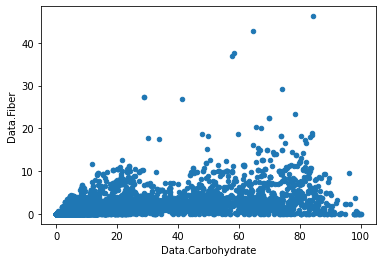

In [76]:
df.plot(kind='scatter',
        x='Data.Carbohydrate',
        y='Data.Fiber');

The correlation between carbohhydrates and fiber is pretty weak (r = 0.48). The scatter plot doesn't show a clear pattern aside from a very slight positive direction (hence low positve r value), likely influenced by the handful of high fiber values, otherwise a wide range of carb values have fiber values between 0 and ~10/15.

**hexagonal binning plot of Carbohydrates vs Fiber**

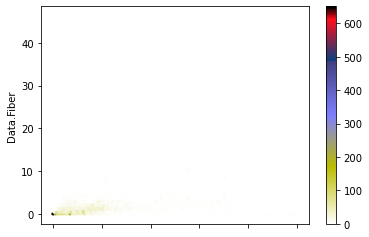

In [79]:
df.plot(kind='hexbin',
        cmap='gist_stern_r',
        x='Data.Carbohydrate',
        y='Data.Fiber');

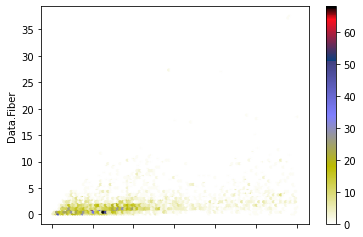

In [86]:
df[(df['Data.Carbohydrate'] < 60) & 
  df['Data.Fiber']].plot(kind='hexbin',
        cmap='gist_stern_r',
        x='Data.Carbohydrate',
        y='Data.Fiber');

**BONUS POINT**
(couldn't figure out the grouping part..)

In [87]:
import seaborn

In [ ]:
seaborn.FacetGrid(df, col ="Data",  hue ="day")

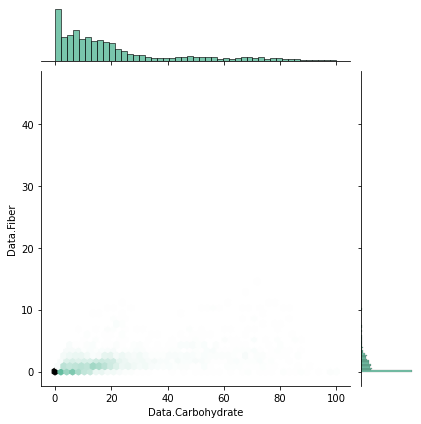

In [96]:
x = df['Data.Carbohydrate']
y = df['Data.Fiber']
seaborn.jointplot(x=x, y=y, kind="hex", color="#4CB391");